In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import string
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /Users/donor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
jobs = pd.read_csv('/Users/donor/PycharmProjects/DE_job_market/nlp/english_jobs_ner.csv', index_col=[0])
jobs

FileNotFoundError: [Errno 2] No such file or directory: './nlp/english_jobs_ner.csv'

In [4]:
custom_stopwords = ['cookie', 'cooky', 'bloqué', 'contenu', 'voir', 'content', 'blocked', 'accepte', 'accepter', 'youtube', 'required', 'show', 'etc', 'sexual', 'orientation', 'plus', 'cooky accept', 'gender', 'identity']
stop_words = stopwords.words('english') + stopwords.words('french') + custom_stopwords
stemmatizer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [5]:
def preprocess_text_wordcloud(text):
    # Remove spaces at the beginning of entire text
    text = re.sub('^[\\]n[\s]*', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans("","",string.punctuation))
    text = re.sub('[^\w\s]', '', text)
    # Remove digits
    text = re.sub('[\d]', '', text)
    # Lowering
    text = text.lower()
    # Tokenizing
    tokens = word_tokenize(text)
    # Remove whitespaces
    tokens = [token.strip() for token in tokens]
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Stemmatizing / lemmatizing
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Joining
    processed_text = ' '.join(tokens)
    return processed_text

In [6]:
jobs['processed_text'] = jobs['text'].apply(lambda x: preprocess_text_wordcloud(x))

In [7]:
text = " ".join(text for text in jobs.processed_text)
word_cloud = WordCloud(background_color = 'black', max_words=80).generate(text)

tokens = word_tokenize(text)
counts = Counter(tokens)
counts.most_common()

[('data', 4750),
 ('team', 2889),
 ('experience', 2084),
 ('work', 1679),
 ('business', 1140),
 ('product', 1118),
 ('company', 986),
 ('new', 919),
 ('u', 880),
 ('technology', 876),
 ('customer', 835),
 ('engineering', 803),
 ('skill', 796),
 ('platform', 780),
 ('engineer', 765),
 ('working', 762),
 ('solution', 736),
 ('help', 697),
 ('opportunity', 680),
 ('environment', 659),
 ('technical', 650),
 ('cooky', 650),
 ('build', 647),
 ('process', 634),
 ('learning', 630),
 ('project', 598),
 ('tool', 583),
 ('year', 572),
 ('knowledge', 562),
 ('system', 556),
 ('development', 551),
 ('people', 544),
 ('service', 543),
 ('one', 540),
 ('client', 539),
 ('strong', 538),
 ('design', 535),
 ('world', 529),
 ('need', 524),
 ('across', 521),
 ('make', 516),
 ('join', 509),
 ('office', 498),
 ('user', 496),
 ('like', 489),
 ('looking', 484),
 ('software', 482),
 ('use', 472),
 ('best', 459),
 ('support', 429),
 ('building', 425),
 ('science', 418),
 ('model', 417),
 ('mission', 413),
 ('ro

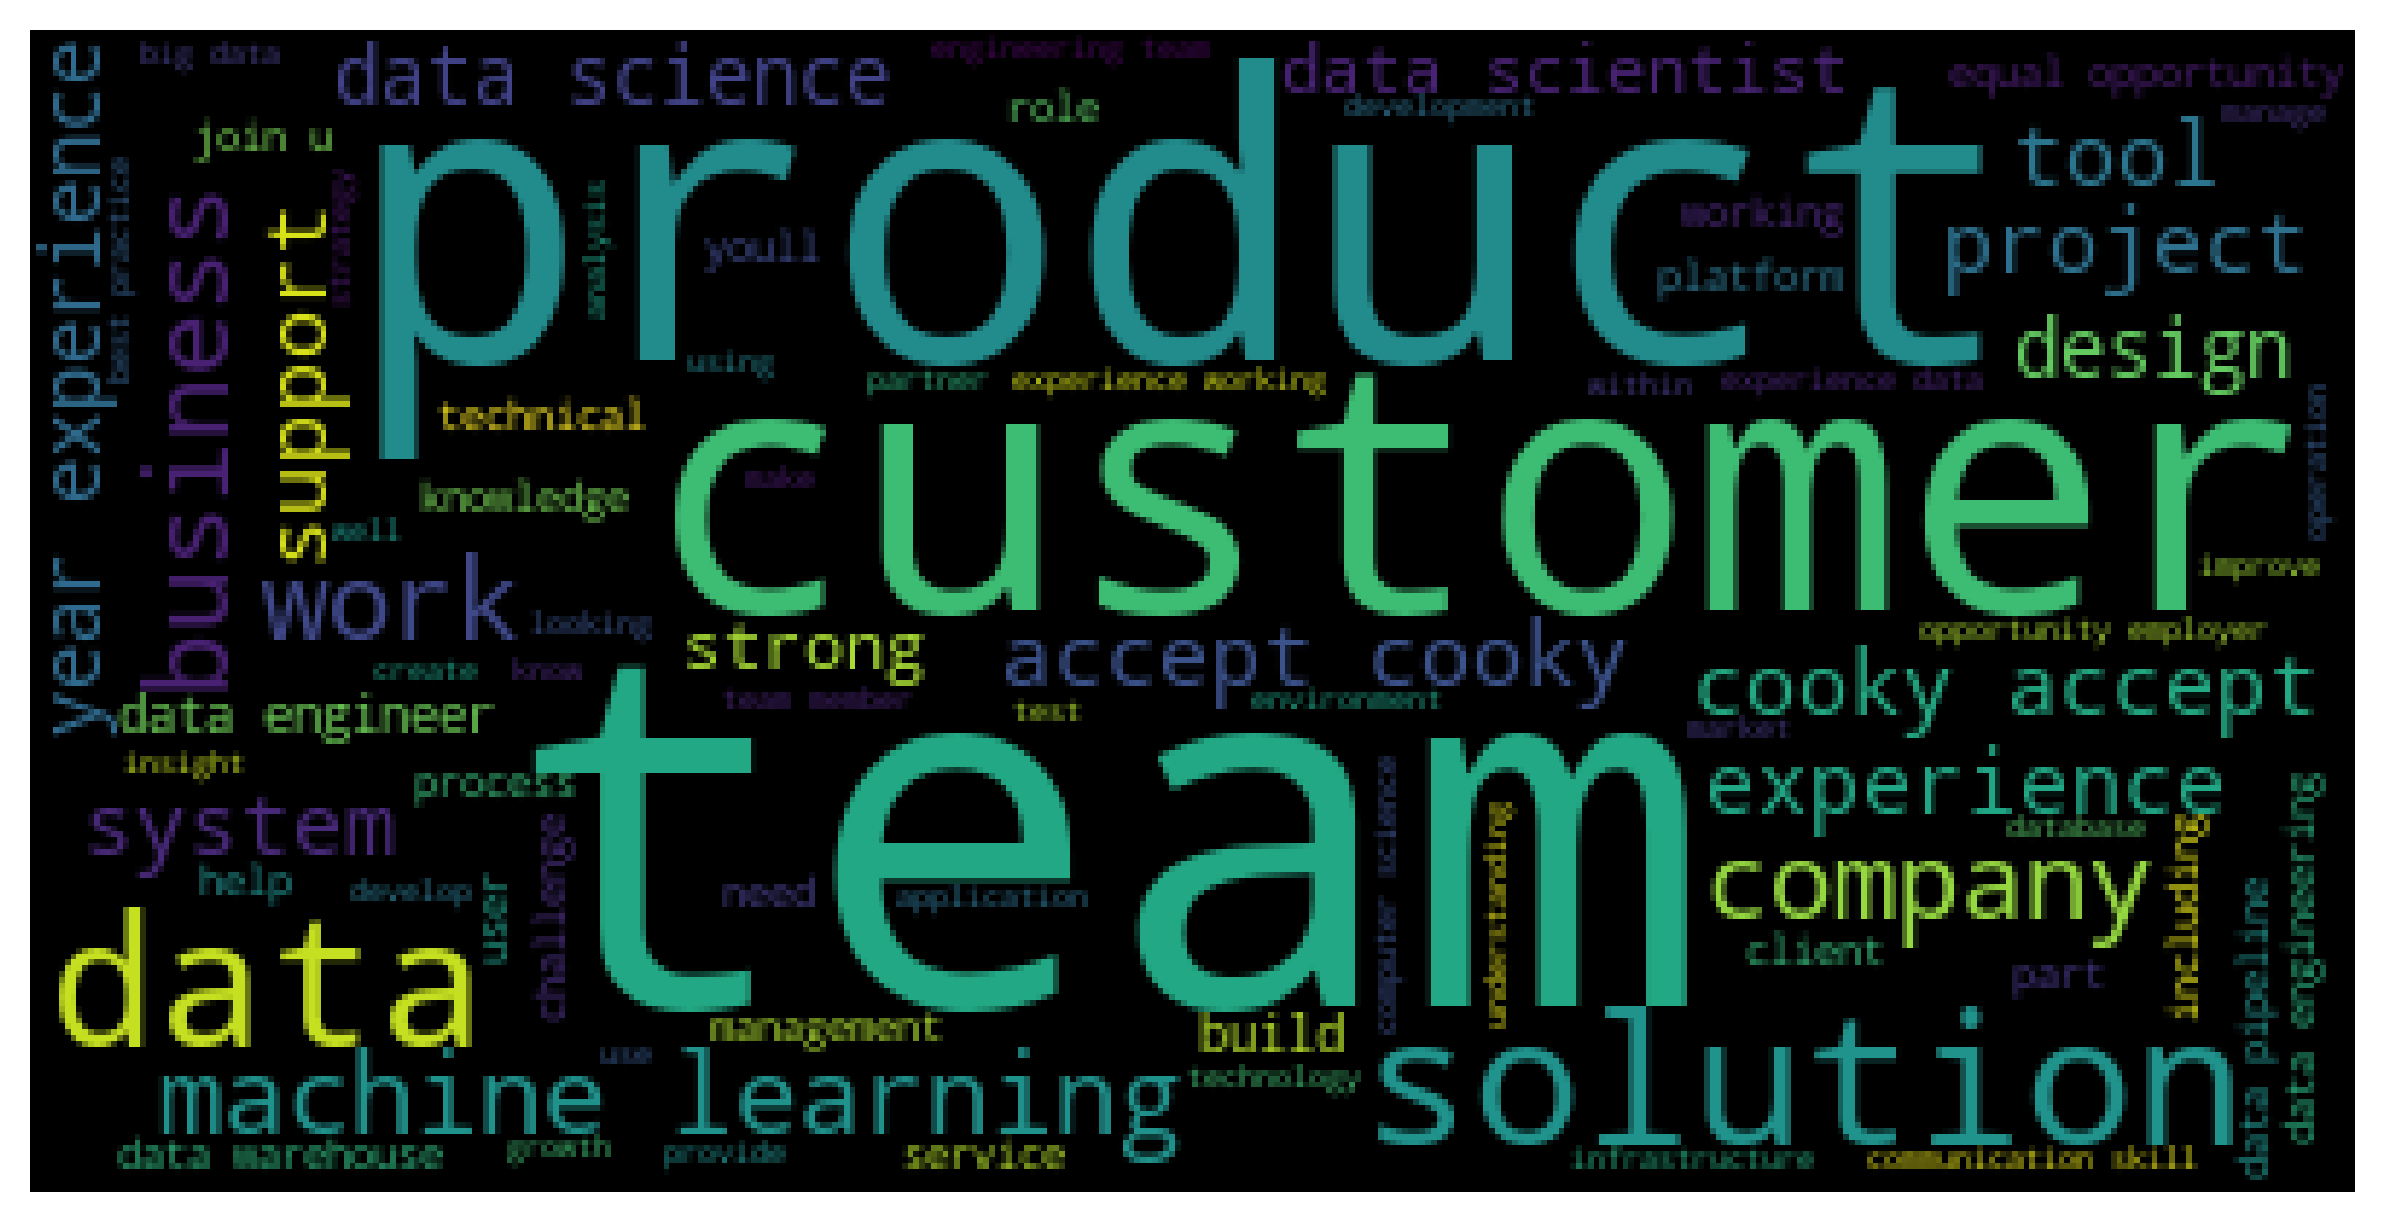

In [8]:
plt.figure(figsize=(10,10), dpi=300)
plt.axis('off')
plt.imshow(word_cloud)
plt.savefig('wordcloud.png');